In [1]:
import matplotlib.pyplot as plt
import numpy
import os
import cv2
import pandas

In [2]:
paths = os.listdir("data/")
paths = [val for val in paths if 'TCGA' in val]
len(paths)

110

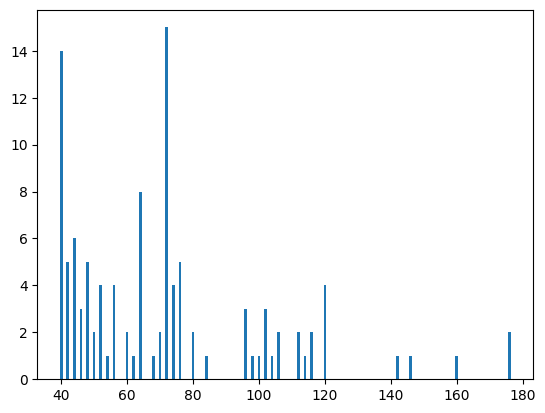

In [3]:
nums = [len(os.listdir('data/'+path)) for path in paths]
a, b = numpy.unique(nums, return_counts=True)
plt.bar(a, b)
plt.show()

file in .tif format (can be formated)

110 pats.

1 person min 40 pics.

image number split 2:
 1. RGB
 2. Mask (_mask)

In [4]:
def process(path):
    imp = [p[:-4] for p in os.listdir(path) if 'mask' not in p]
    imp.sort(key=lambda x: int(x.split('_')[-1]))
    rgbs, masks = [], []
    for root in imp:
        rgb = cv2.imread(path + root + '.tif')
        mask = cv2.imread(path + root + '_mask.tif')
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
        rgbs.append(rgb)
        masks.append(mask)
    return rgbs, masks

In [5]:
matrix = []
for path in os.listdir('data/'):
    if 'TCGA' not in path:
        continue
    rgbs, masks = process('data/' + path + '/')
    matrix.append(masks[:20])
matrix = numpy.array(matrix)
matrix[matrix==255] = 1
matrix = numpy.sum(matrix, axis=2)
matrix = numpy.sum(matrix, axis=2)
matrix = numpy.mean(matrix, axis=0)
matrix.shape

(20,)

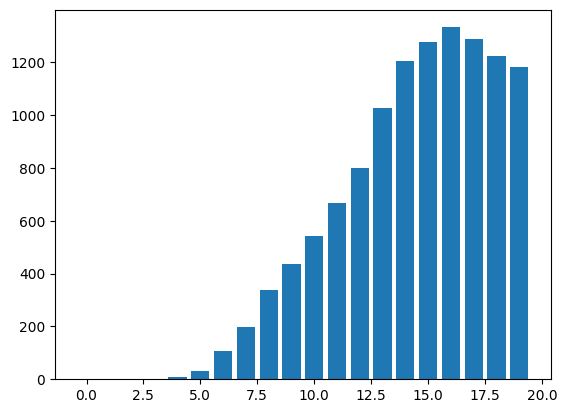

In [6]:
plt.bar(range(20), matrix)
plt.show()

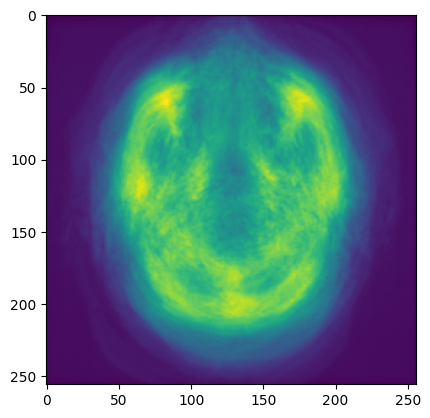

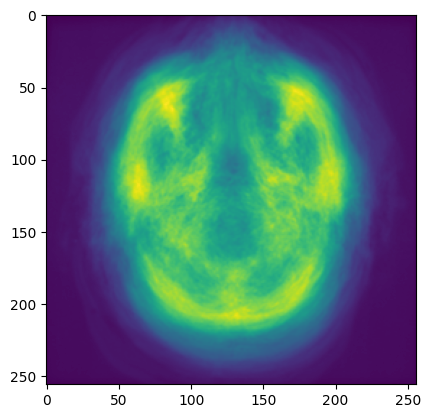

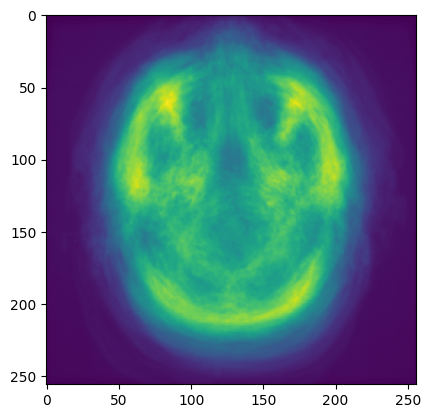

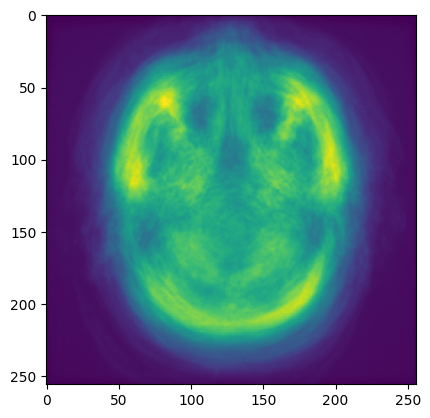

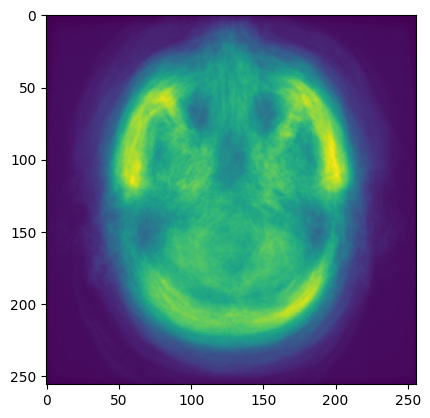

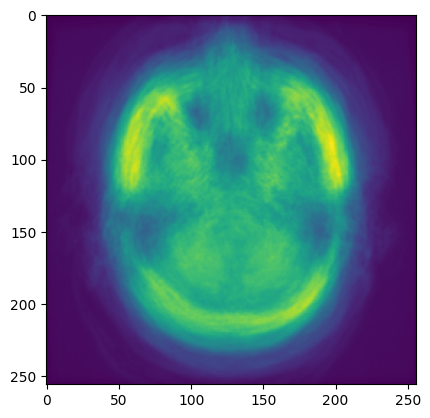

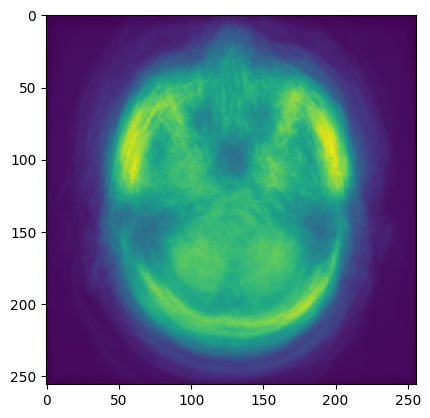

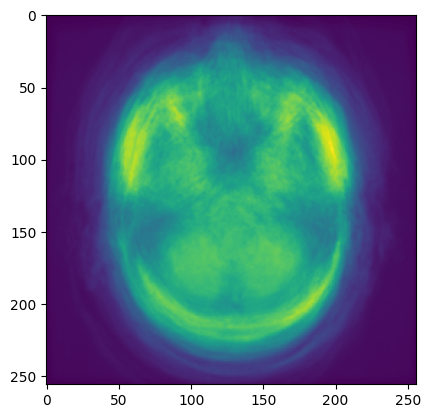

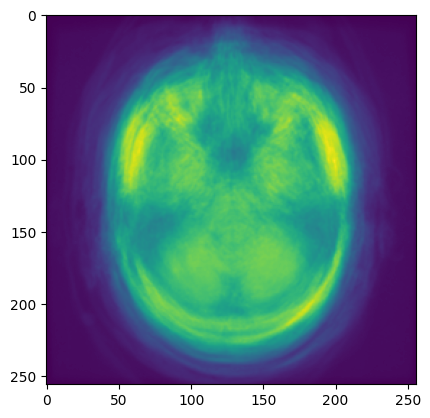

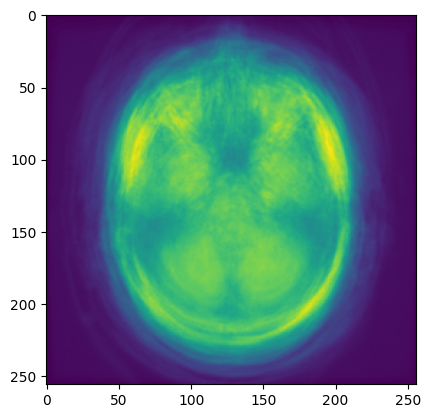

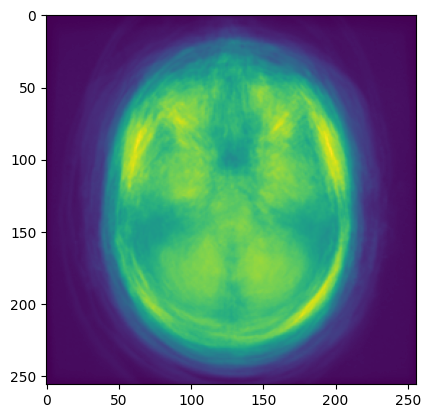

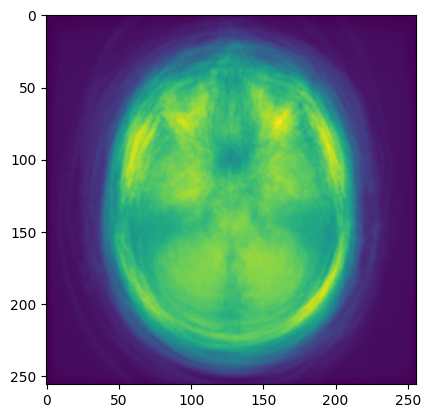

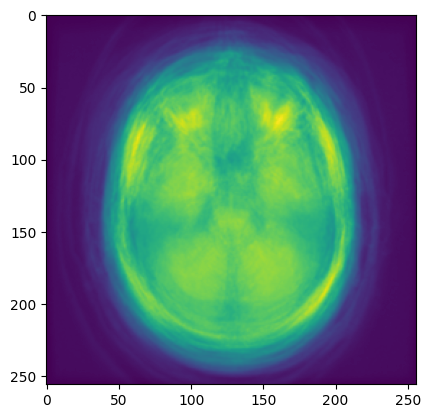

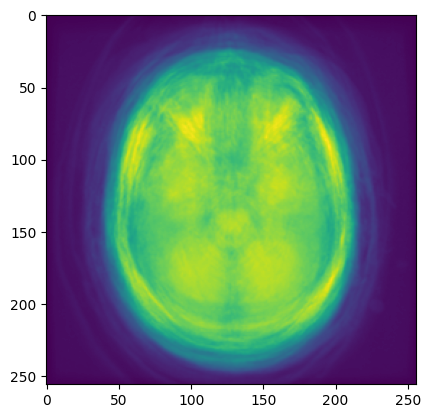

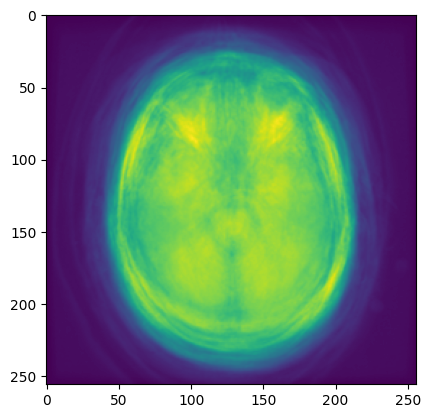

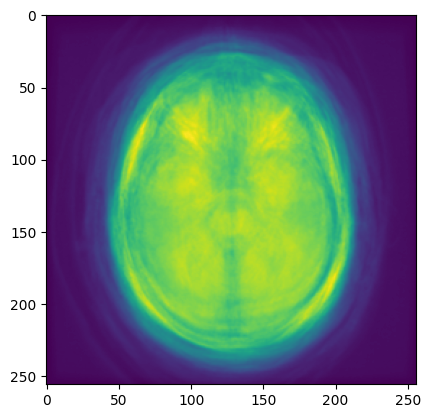

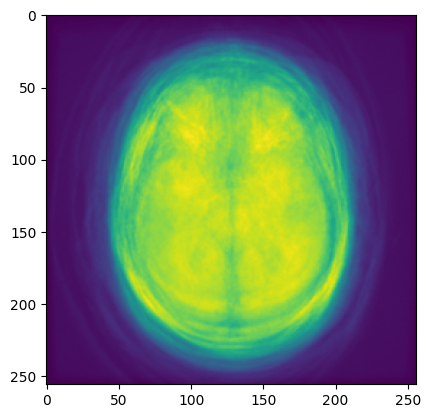

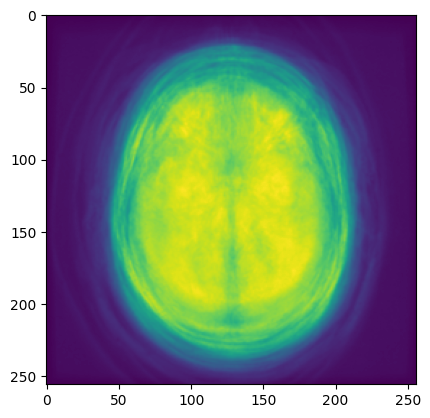

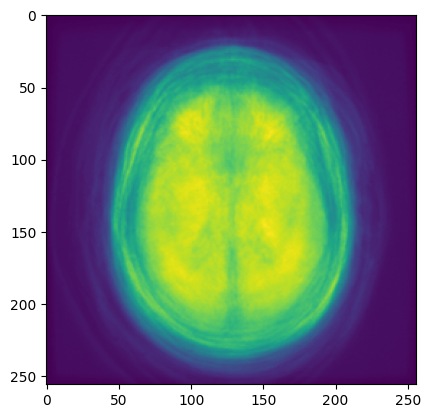

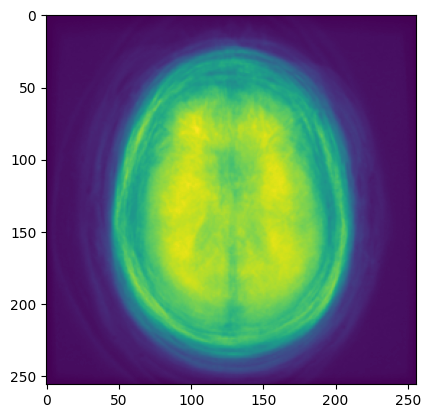

In [41]:
for i in range(20):
    matrix = []
    for path in os.listdir('data/'):
        if 'TCGA' not in path:
            continue
        rgbs, masks = process('data/' + path + '/')
        matrix.append(rgbs[i])
    matrix = numpy.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
                      for img in matrix])
    matrix = numpy.mean(matrix, axis=0)
    plt.imshow(matrix)
    plt.show()

/tmp/ipykernel_11015/4206208197.py:7: RuntimeWarning: overflow encountered in scalar subtract
  mat.append((line[i+1] - line[i-1])/2)


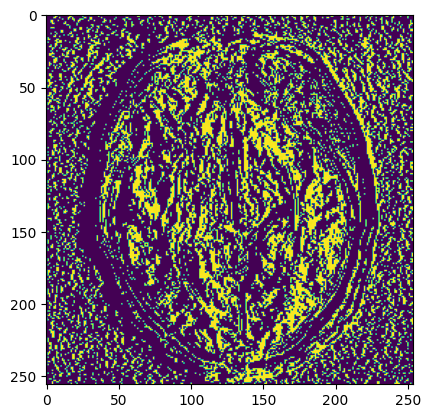

In [31]:
sm_img = matrix[0]
def derivation_x(sm_img):
    der_img = []
    for line in sm_img:
        mat = []
        for i in range(1, len(line) - 1):
            mat.append((line[i+1] - line[i-1])/2)
        der_img.append(mat)
    der_img = numpy.array(der_img)
    der_img[der_img < 125] = 0
    return der_img
plt.imshow(derivation_x(sm_img))

In [34]:
matrix = []
for path in os.listdir('data/'):
    if 'TCGA' not in path:
        continue
    rgbs, masks = process('data/' + path + '/')
    matrix.append(masks[:20])
matrix = numpy.array(matrix)
matrix.shape

(110, 20, 256, 256)

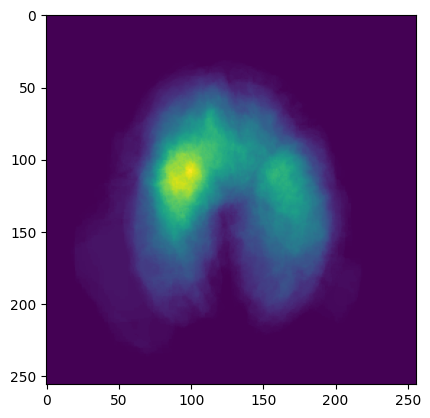

In [35]:
matrix = numpy.mean(matrix, axis=0)
matrix = numpy.mean(matrix, axis=0)
plt.imshow(matrix)
plt.show()